In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from glob import glob
%matplotlib inline

In [63]:
# Get and read data file
files = glob("../Data/Lab06-Filters/*.csv")
files.sort()
for (i, f) in enumerate(files):
    print(f"{i:3d} ==> {f}")
i_file = int(input("Enter file number: "))
csv_file = files[i_file]
run_name = csv_file[csv_file.rfind('/')+1:csv_file.rfind('.')]
data = np.genfromtxt(csv_file, comments='#', delimiter=',')
print(f"Size of data is {data.shape}")
(fr, Vsig, VsRMS, Vfilt, VfRMS, H) = data.T

  0 ==> ../Data/Lab06-Filters/2024-11-12-1250.csv
  1 ==> ../Data/Lab06-Filters/2024-11-14-1201.csv
  2 ==> ../Data/Lab06-Filters/2024-11-14-1230.csv
  3 ==> ../Data/Lab06-Filters/2024-11-14-1519.csv
  4 ==> ../Data/Lab06-Filters/2024-11-14-1527.csv


Enter file number:  4


Size of data is (25, 6)


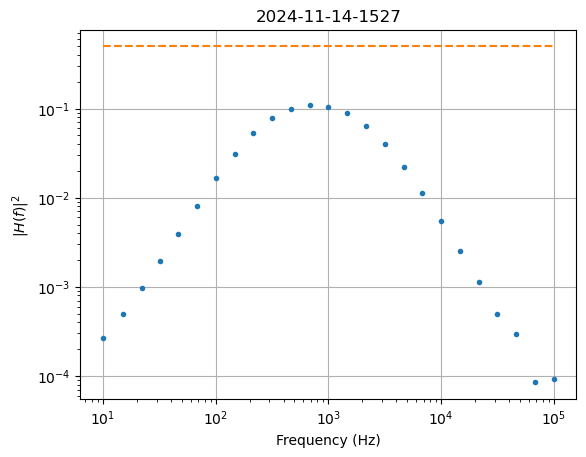

In [64]:
plt.plot(fr, H**2, '.')
plt.plot(fr, len(fr)*[0.5], '--')
plt.title(run_name)
plt.grid()
plt.xlabel("Frequency (Hz)")
plt.xscale('log')
plt.ylabel("$|H(f)|^2$")
plt.yscale('log')
plt.savefig(run_name+"_00.png", dpi=150)

# Fit Transfer Function

In [67]:
def H_model(f, f0):
    return (f/f0)**2 / (1 + (f/f0)**2)

def H_band(f, f0):
    return ((f/f0)**2 / (1 + (f/f0)**2)) * (1 / (1 + (f/f0)**2))

output = sp.optimize.curve_fit(H_band, fr, H**2, p0=[1000.0], full_output=True)
fr_opt = output[0][0]
fr_opt_sig = output[1][0][0]
print(f"Best fit is f0 = {fr_opt:.2f} ± {fr_opt_sig:.2f} Hz")

Best fit is f0 = 742.09 ± 7232.56 Hz


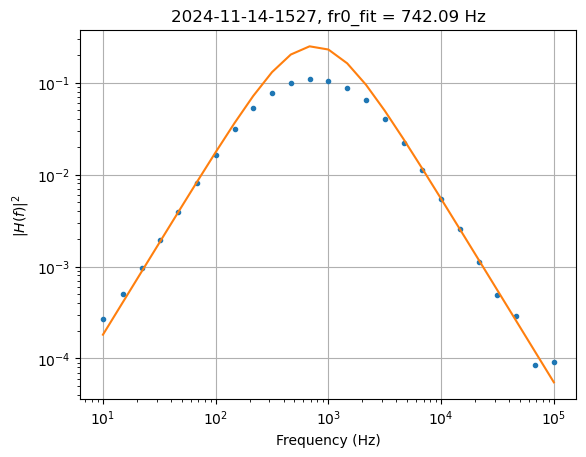

In [68]:
plt.plot(fr, H**2, '.', label='Data')
plt.plot(fr, H_band(fr, fr_opt), '-', label="Best Fit")
plt.title(run_name+ f", fr0_fit = {fr_opt:.2f} Hz")
plt.grid()
plt.xlabel("Frequency (Hz)")
plt.xscale('log')
plt.ylabel("$|H(f)|^2$")
plt.yscale('log')
plt.savefig(run_name+"_01.png", dpi=150)

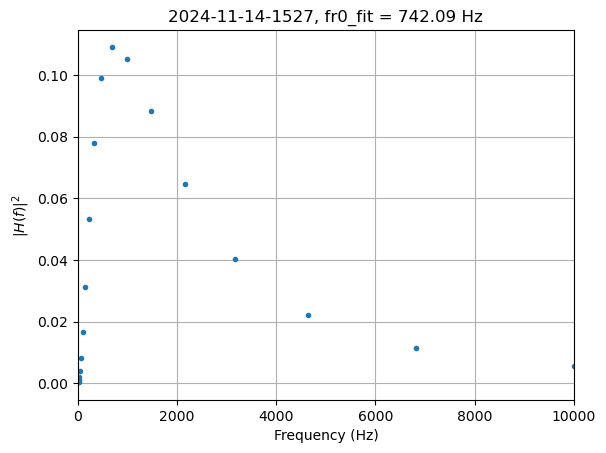

In [72]:
plt.plot(fr, H**2, '.', label='Data')
plt.title(run_name+ f", fr0_fit = {fr_opt:.2f} Hz")
plt.grid()
plt.xlabel("Frequency (Hz)")
plt.xscale('linear')
plt.xlim(0, 10000)
plt.ylabel("$|H(f)|^2$")
plt.yscale('linear')
plt.savefig(run_name+"_02.png", dpi=150)